### Kelompok 7 Kecerdasan Buata - IF A2 2020
#### <li>2009106013 Yanuar Satria Gotama</li>
#### <li>2009106016 Satria Bagus Eka Chandra</li>
#### <li>2009106022 Gempar Panggih Dwi Putra</li>
#### Project - Klasifikasi Buah-buahan
#### Link Dataset - https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

### Preprocessing dan Data Collecting

Disini kami menggunakan dataset buah-buahan dari Kaagle yang merupakan tipe Dataset citra atau gambar. Terdapat 32 Class atau jenis buah-buahan dalam dataset ini. Dengan dataset ini kami akan membuat sebuah projek deep learning yang memiliki fungsi mengklasifikasi buah berdasarkan gambar.

In [2]:
trainDirectory = 'fruit-recognition/train/train'
imageHeight = 100
imageWidth = 100
inputShape = (imageHeight, imageWidth, 3)

Dalam tahap preprocessing dan data collecting kami menggunakan sebuah fungsi pada tensorflow untuk mempermudah yaitu ImageDataGenerator.

In [3]:
imageDataGenerator = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

testDataGenerator = ImageDataGenerator(rescale=1./255)

trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


### Data Visualization

#### Preview Gambar

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (120,120)
BASE_PATH = 'fruit-recognition/'

train_path = 'fruit-recognition/train/train/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 16854 images belonging to 33 classes.


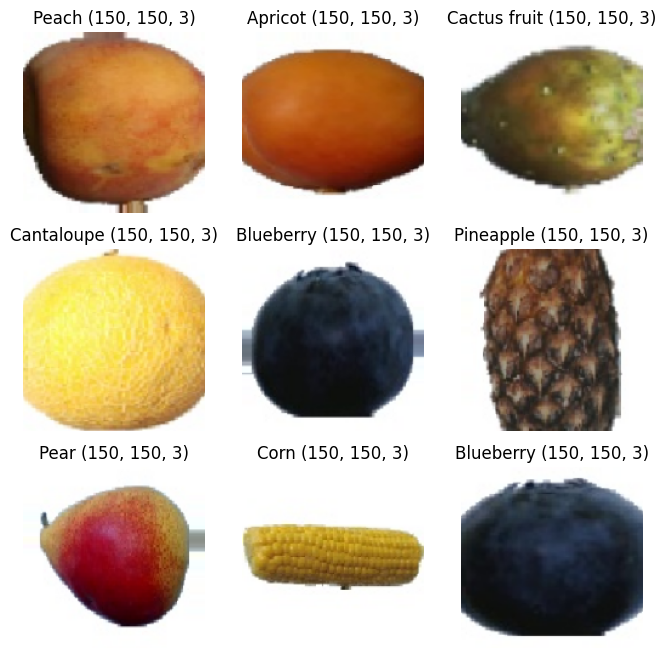

In [5]:
class_names = os.listdir(train_path)

image, label = train_generator.next()

plt.figure(figsize=(8,8))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(f'{class_names[np.argmax(label[i])]} {image[i].shape}')
  plt.axis("off")

#### Metadata

In [6]:
def getsize():
    image_count = 0
    data_dir = pathlib.Path(train_path)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

In [7]:
print("Datasets      :  Fruit Dataset")
print("Image Feature : ", image.shape)
print("Label Feature : ", class_names)
print("Image Count   : ", getsize())

Datasets      :  Fruit Dataset
Image Feature :  (32, 150, 150, 3)
Label Feature :  ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Image Count   :  16854


#### Class Distribution

In [8]:
class_size = []
for i in os.listdir(train_path):
    image_count = 0
    data_dir = pathlib.Path(train_path + '/'+ i)
    count = len(os.listdir(data_dir))
    class_size.append(count)

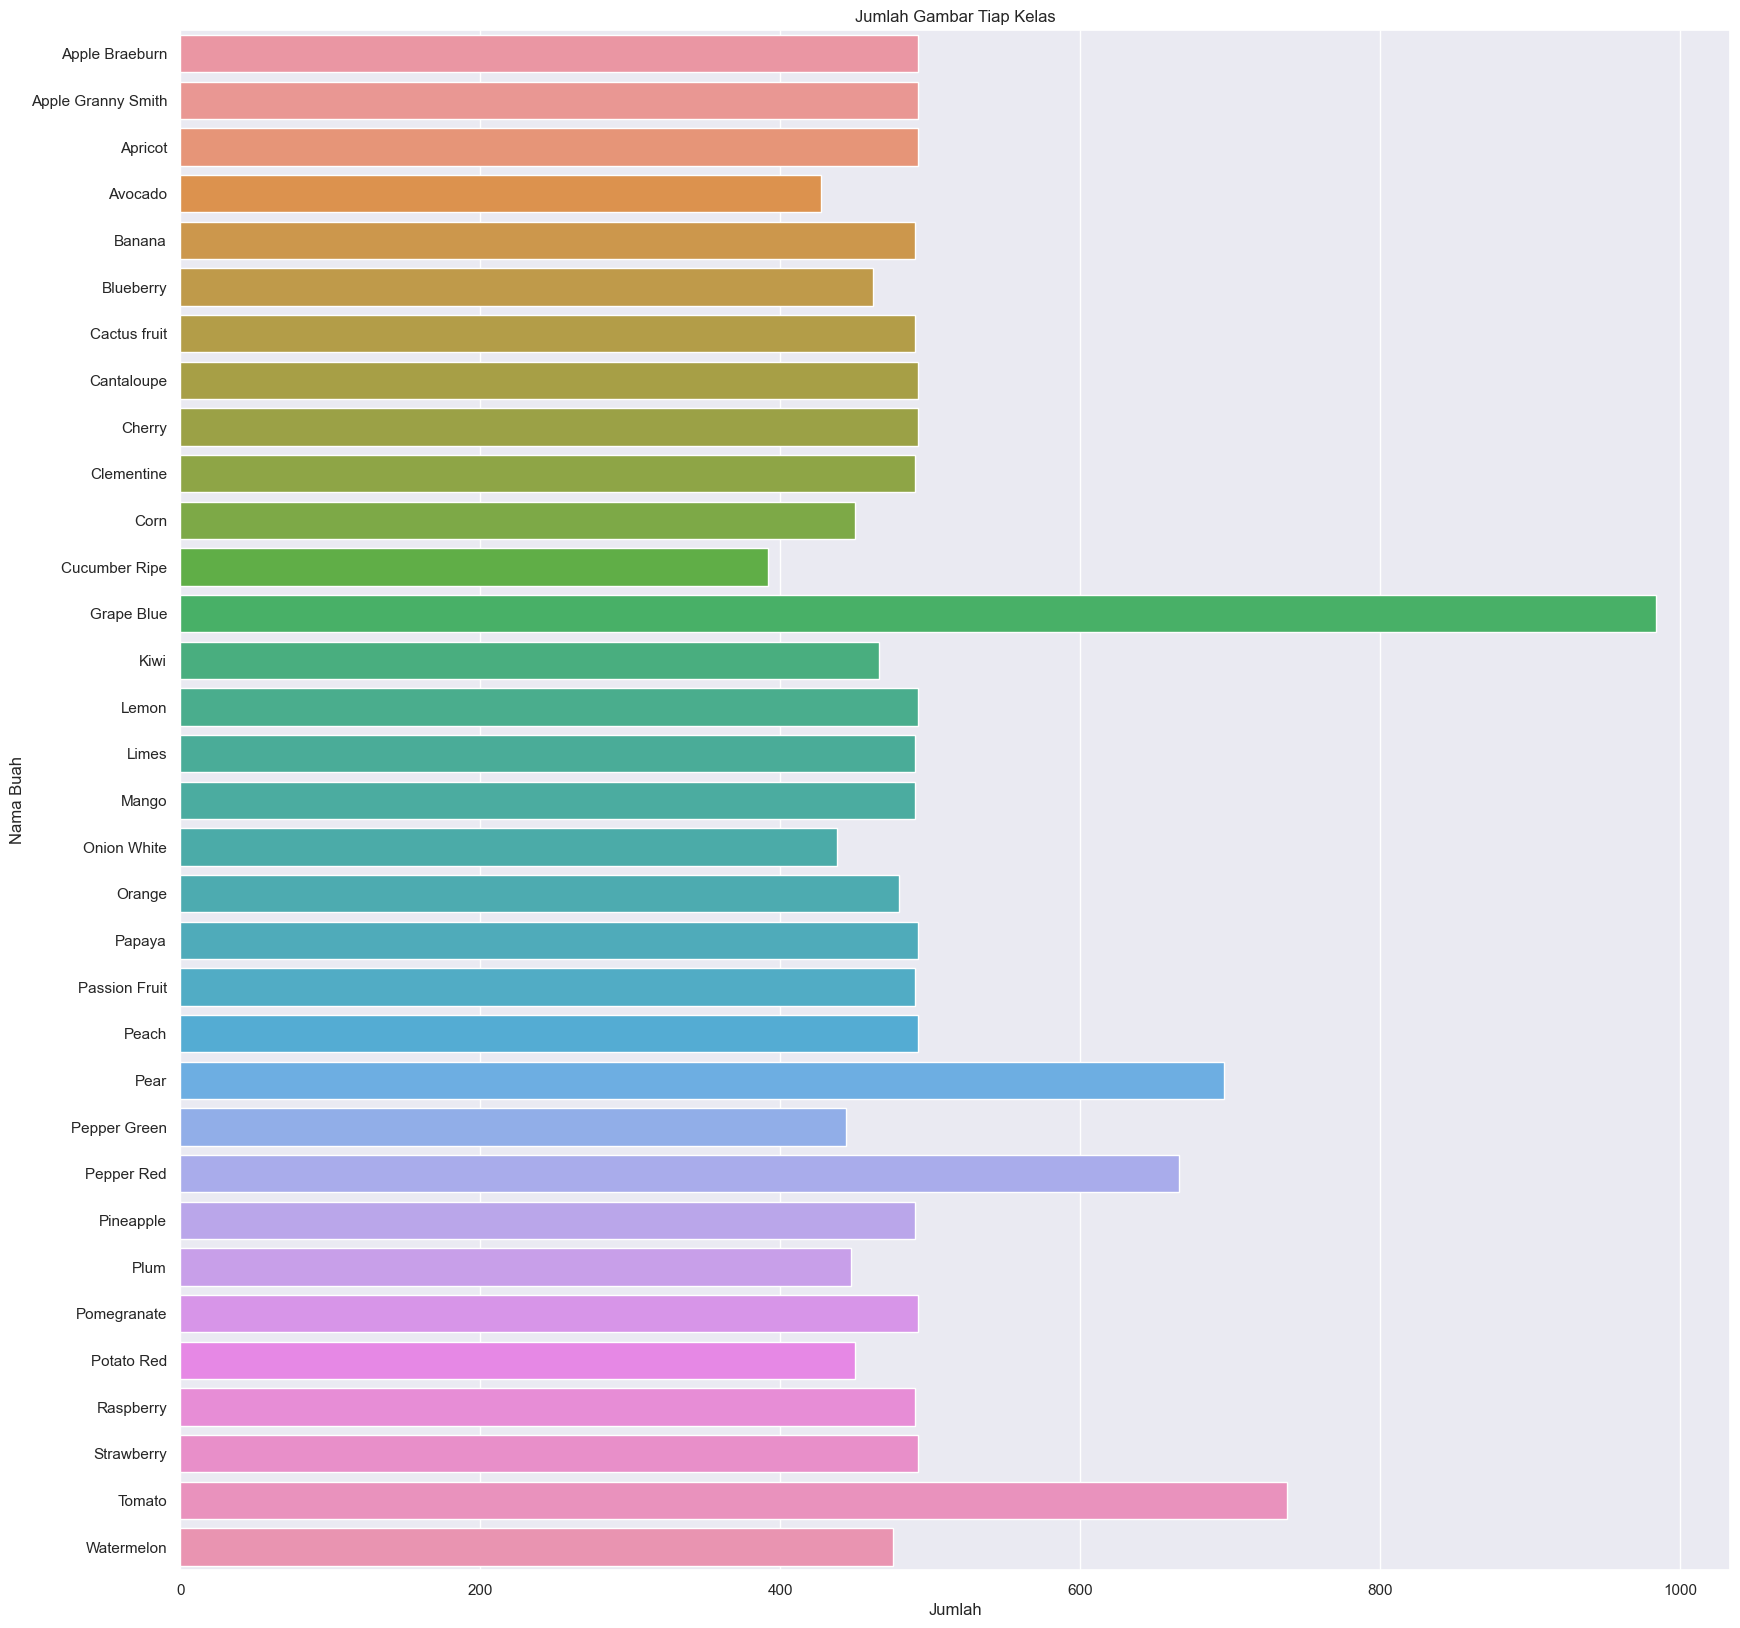

In [9]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.barplot(y=class_names,x=class_size,orient="h")
plt.title('Jumlah Gambar Tiap Kelas')
plt.xlabel('Jumlah')
plt.ylabel('Nama Buah')
plt.show()